In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats, integrate
from sklearn import metrics
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [ ]:
#read dataset
df = pd.read_csv('iris.csv')
df.head(10)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

In [ ]:
# Copy of iris dataset
iris_data= df
iris_data.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0          5.10         3.50          1.40         0.20        0
1          4.90         3.00          1.40         0.20        0
2          4.70         3.20          1.30         0.20        0
3          4.60         3.10          1.50         0.20        0
4          5.00         3.60          1.40         0.20        0

In [ ]:
# change categorical to numerical
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [ ]:
df['Species'] = df['Species'].astype('category').cat.codes
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0          5.10         3.50          1.40         0.20        0
1          4.90         3.00          1.40         0.20        0
2          4.70         3.20          1.30         0.20        0
3          4.60         3.10          1.50         0.20        0
4          5.00         3.60          1.40         0.20        0

In [ ]:
X = df[['Sepal.Width','Petal.Length','Petal.Width','Species']]
Y = df['Sepal.Length']
X.head()

Sepal.Width  Petal.Length  Petal.Width  Species
0         3.50          1.40         0.20        0
1         3.00          1.40         0.20        0
2         3.20          1.30         0.20        0
3         3.10          1.50         0.20        0
4         3.60          1.40         0.20        0

In [ ]:
df.corr()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
Sepal.Length          1.00        -0.12          0.87         0.82     0.78
Sepal.Width          -0.12         1.00         -0.43        -0.37    -0.43
Petal.Length          0.87        -0.43          1.00         0.96     0.95
Petal.Width           0.82        -0.37          0.96         1.00     0.96
Species               0.78        -0.43          0.95         0.96     1.00

In [ ]:
print(df.corr())

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
Sepal.Length          1.00        -0.12          0.87         0.82     0.78
Sepal.Width          -0.12         1.00         -0.43        -0.37    -0.43
Petal.Length          0.87        -0.43          1.00         0.96     0.95
Petal.Width           0.82        -0.37          0.96         1.00     0.96
Species               0.78        -0.43          0.95         0.96     1.00


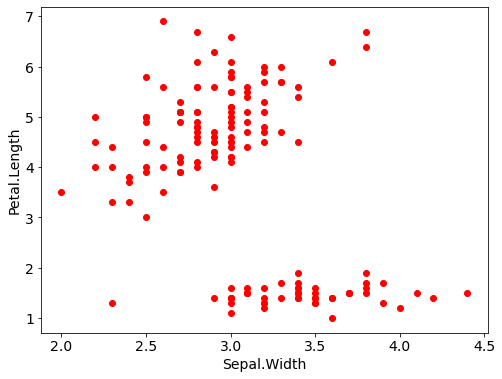

In [ ]:
plt.figure()
plt.scatter(df['Sepal.Width'],df['Petal.Length'],c='red')
plt.xlabel("Sepal.Width")
plt.ylabel("Petal.Length")
plt.show()

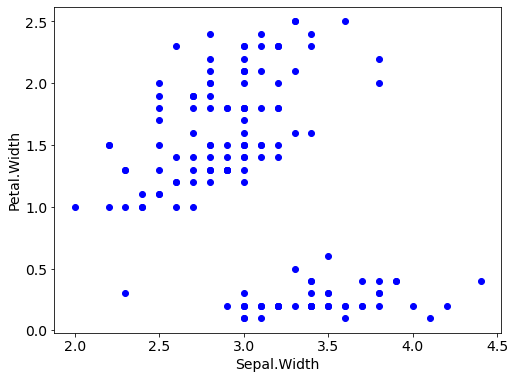

In [ ]:
plt.figure()
plt.scatter(df['Sepal.Width'],df['Petal.Width'],c='blue')
plt.xlabel("Sepal.Width")
plt.ylabel("Petal.Width")
plt.show()

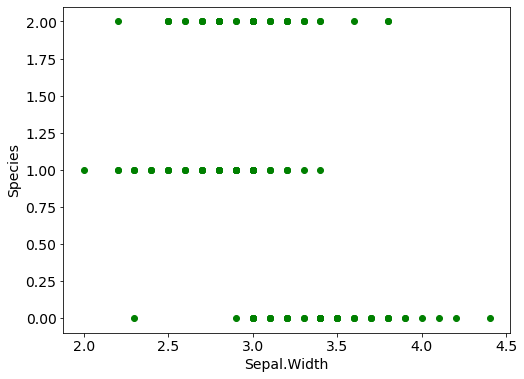

In [ ]:
plt.figure()
plt.scatter(df['Sepal.Width'],df['Species'],c='green')
plt.xlabel("Sepal.Width")
plt.ylabel("Species")
plt.show()

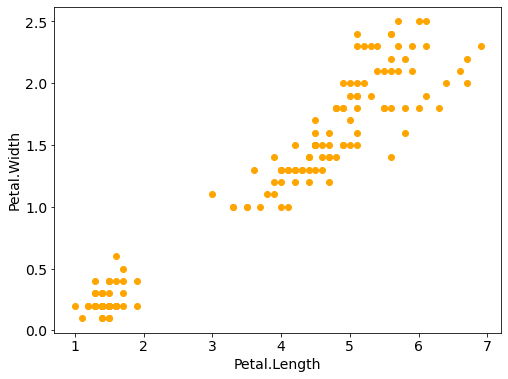

In [ ]:
plt.figure()
plt.scatter(df['Petal.Length'],df['Petal.Width'],c='orange')
plt.xlabel("Petal.Length")
plt.ylabel("Petal.Width")
plt.show()

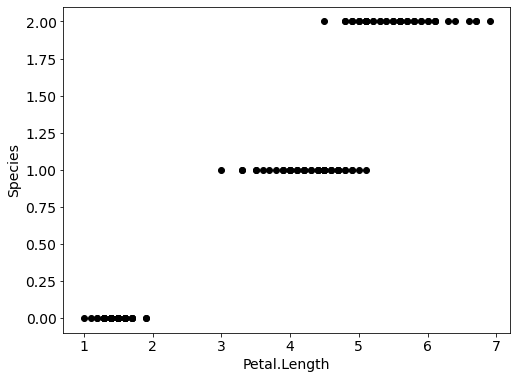

In [ ]:
plt.figure()
plt.scatter(df['Petal.Length'],df['Species'],c='black')
plt.xlabel("Petal.Length")
plt.ylabel("Species")
plt.show()

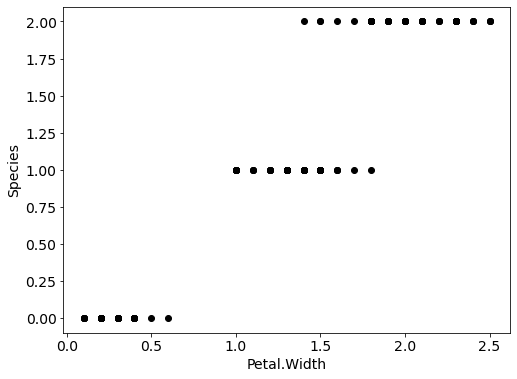

In [ ]:
plt.figure()
plt.scatter(df['Petal.Width'],df['Species'],c='black')
plt.xlabel("Petal.Width")
plt.ylabel("Species")
plt.show()

In [ ]:
df[['Petal.Width','Species','Petal.Length','Sepal.Width','Sepal.Length']].corr()['Sepal.Length'][:]

Petal.Width     0.82
Species         0.78
Petal.Length    0.87
Sepal.Width    -0.12
Sepal.Length    1.00
Name: Sepal.Length, dtype: float64

From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.
It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.


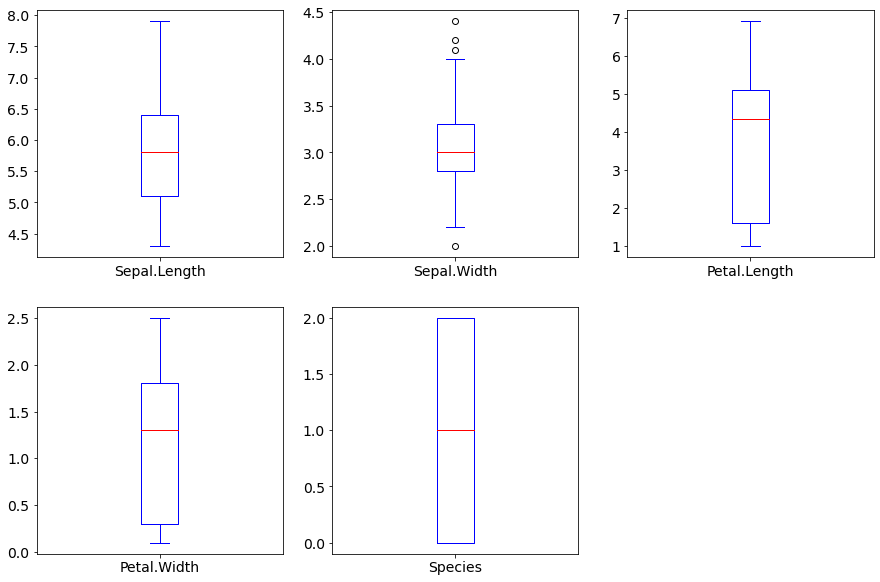

In [ ]:
boxplot=iris_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

print('From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.')
print('It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.')

In [ ]:
# Correlation Matrix for Iris_dataset
iris_data.corr()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
Sepal.Length          1.00        -0.12          0.87         0.82     0.78
Sepal.Width          -0.12         1.00         -0.43        -0.37    -0.43
Petal.Length          0.87        -0.43          1.00         0.96     0.95
Petal.Width           0.82        -0.37          0.96         1.00     0.96
Species               0.78        -0.43          0.95         0.96     1.00

In [ ]:
#Check for multicollinearity thrrough Determinant value
import numpy as np
input_cols = ['Petal.Width','Petal.Length', 'Sepal.Width']
output_variable = ['Sepal.Length']
X = iris_data[input_cols]
Y = iris_data[output_variable]
corr = np.corrcoef(X, rowvar=0)
print(corr)
print('\n')
print (np.linalg.det(corr))

print('\n')

print('petallength and petalwidth are highly correlated=96% and lead to multicollinearity.')
print('\n')
print('Run the input variable in different combination to find the determinant value.The deteminant of correlation matrix is 0<=D<=1.')
print('D=0, then it indicates exact interdependence of expalanatory variable. D=1, then expalanatory variable independent to each other and have no multicollinearity issue.')
print('\n')
print('1.Determinant value for petalwidth, petallength, sepalwidth =0.057.')
print('2.Determinant value for petallength, sepalwidth =0.816.')
print('3.Determinant value for petalwidth, sepalwidth =0.865.')
print('4.Determinant value for petalwidth, petallength =0.072.')
print('\n')
print('We will avoid the model 1 & 4, as the value of D is close to 0, which indicates the multicollinearity issue. Whereas model 2 & 3 are acceptable, as the value of D is close to 1 and independent variables are not dependent to eachother.')
print('In general, when threshold level is D>0.7, then we can take all the input variables in the model.If D<0.4, then we can say that there is lot of interdependency between variables and we need to drop those variables which are highly correlated and causing multicollinearity.')

[[ 1.          0.96286543 -0.36612593]
 [ 0.96286543  1.         -0.4284401 ]
 [-0.36612593 -0.4284401   1.        ]]


0.05735702290426796


petallength and petalwidth are highly correlated=96% and lead to multicollinearity.


Run the input variable in different combination to find the determinant value.The deteminant of correlation matrix is 0<=D<=1.
D=0, then it indicates exact interdependence of expalanatory variable. D=1, then expalanatory variable independent to each other and have no multicollinearity issue.


1.Determinant value for petalwidth, petallength, sepalwidth =0.057.
2.Determinant value for petallength, sepalwidth =0.816.
3.Determinant value for petalwidth, sepalwidth =0.865.
4.Determinant value for petalwidth, petallength =0.072.


We will avoid the model 1 & 4, as the value of D is close to 0, which indicates the multicollinearity issue. Whereas model 2 & 3 are acceptable, as the value of D is close to 1 and independent variables are not dependent to eachother.
In ge

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
df.describe()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
count        150.00       150.00        150.00       150.00   150.00
mean           5.84         3.06          3.76         1.20     1.00
std            0.83         0.44          1.77         0.76     0.82
min            4.30         2.00          1.00         0.10     0.00
25%            5.10         2.80          1.60         0.30     0.00
50%            5.80         3.00          4.35         1.30     1.00
75%            6.40         3.30          5.10         1.80     2.00
max            7.90         4.40          6.90         2.50     2.00

In [ ]:
print(X_train)

     Sepal.Width  Petal.Length  Petal.Width  Species
22          3.60          1.00         0.20        0
15          4.40          1.50         0.40        0
65          3.10          4.40         1.40        1
11          3.40          1.60         0.20        0
42          3.20          1.30         0.20        0
..           ...           ...          ...      ...
71          2.80          4.00         1.30        1
106         2.50          4.50         1.70        2
14          4.00          1.20         0.20        0
92          2.60          4.00         1.20        1
102         3.00          5.90         2.10        2

[120 rows x 4 columns]


In [ ]:
print(y_train)

22    4.60
15    5.70
65    6.70
11    4.80
42    4.40
      ... 
71    6.10
106   4.90
14    5.80
92    5.80
102   7.10
Name: Sepal.Length, Length: 120, dtype: float64


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

1.7638465717372291
[ 0.63303211  0.79447098 -0.53502964 -0.22227561]


In [ ]:
regressor.score(X,Y)

0.8604604110132508

In [ ]:
model = regressor.fit(X_train,y_train)

y_test_pred=model.predict(X_test)
print(y_test_pred)

[6.40603889 5.35946035 7.21646041 6.14993902 6.37848006 4.89385035
 5.54192106 6.1029287  5.70681654 5.7071589  6.3267408  4.7216993
 4.90526529 4.86444961 5.20056616 6.50854309 6.64925814 5.63405544
 6.19364173 6.36375752 4.95369695 6.14824611 4.97329745 6.41726049
 7.73937234 6.11907259 6.54675394 6.8018087  4.61469337 4.89039374]


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.24
Mean squared error = 0.1
Median absolute error = 0.16
Explain variance score = 0.87
R2 score = 0.86
